# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [11]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# following is needed to run it locally
#human_files = np.array(glob("./lfw/*/*"))
#dog_files = np.array(glob("./dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13234 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


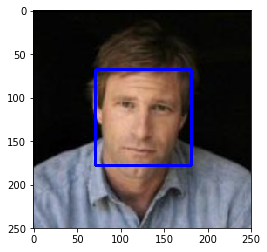

In [12]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [13]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

face_detector(human_files[155])

True

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
Answer is printed after excuting below cell.

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_face_detected_in_human_files = 0
human_face_detected_in_dog_files = 0

for i in range(100):
    if(face_detector(human_files_short[i])):
        human_face_detected_in_human_files += 1
    if(face_detector(dog_files_short[i])):
        human_face_detected_in_dog_files +=1
        
print('Percentage of the first 100 images in human_files have a detected human face : {0:.0%}'.format(human_face_detected_in_human_files / 100))
print('Percentage of the first 100 images in dog_files have a detected human face : {0:.0%}'.format(human_face_detected_in_dog_files / 100))


Percentage of the first 100 images in human_files have a detected human face : 96%
Percentage of the first 100 images in dog_files have a detected human face : 18%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [14]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [15]:
from PIL import Image
from torchvision import datasets, transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    
    img = Image.open(img_path)
        
    transform_pipeline = transforms.Compose([transforms.Resize((224,224)),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])
    img = transform_pipeline(img)
    
    img = img.unsqueeze(0)

    output = VGG16(img)
    
    _, preds_tensor = torch.max(output, 1)
    
    
    return preds_tensor.item() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [16]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction = VGG16_predict(img_path)
    if(prediction >= 151 and prediction <= 268):
        return True
    else:
        return False
    
    #return None # true/false

dog_detector(dog_files[0])

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ Answer is printed after excuting below cell.


In [18]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

dog_detected_in_human_files = 0
dog_detected_in_dog_files = 0

for i in range(100):
    if(dog_detector(human_files_short[i])):
        dog_detected_in_human_files += 1
    if(dog_detector(dog_files_short[i])):
        dog_detected_in_dog_files += 1

print('Percentage of the first 100 images in human_files have a detected dog : {0:.0%}'.format(dog_detected_in_human_files / 100))
print('Percentage of the first 100 images in dog_files have a detected dog : {0:.0%}'.format(dog_detected_in_dog_files / 100))

Percentage of the first 100 images in human_files have a detected dog : 0%
Percentage of the first 100 images in dog_files have a detected dog : 95%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [19]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

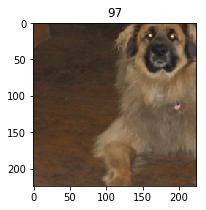

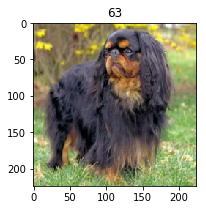

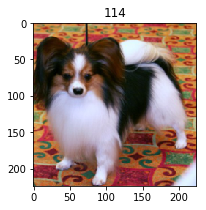

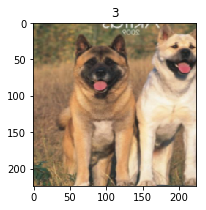

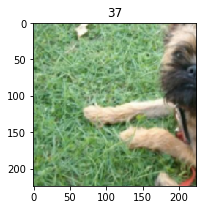

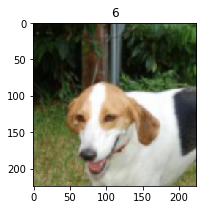

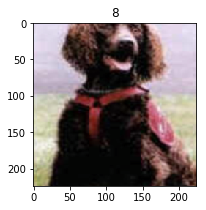

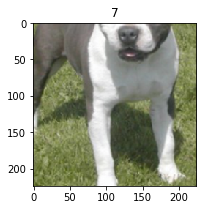

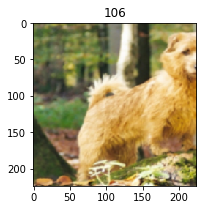

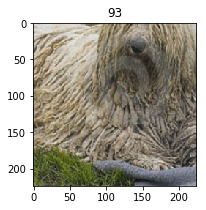

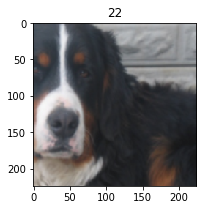

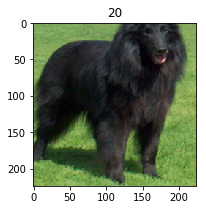

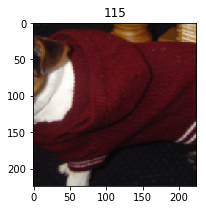

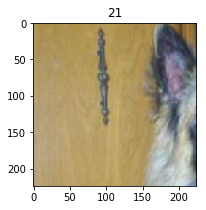

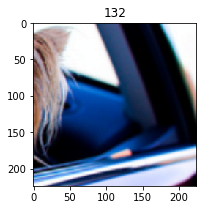

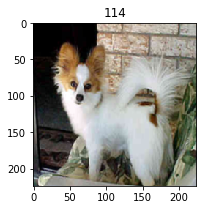

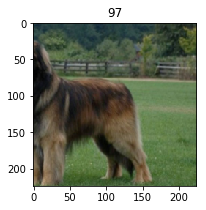

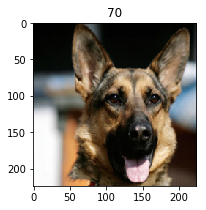

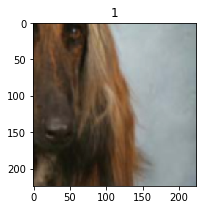

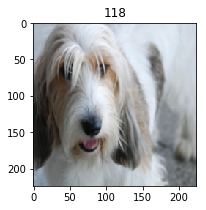

In [21]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

standard_normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])


data_transforms = {'train': transforms.Compose([transforms.Resize(256),
                                     transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     standard_normalization]),
                   'valid': transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     standard_normalization]),
                   'test': transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     standard_normalization])
                  }

# choose the training and test datasets
train_data = datasets.ImageFolder('/data/dog_images/train', transform=data_transforms['train'])
valid_data = datasets.ImageFolder('/data/dog_images/valid', transform=data_transforms['valid'])
test_data = datasets.ImageFolder('/data/dog_images/test'/data/dog_images/train, transform=data_transforms['test'])

# Following is need to test locally
#train_data = datasets.ImageFolder('./dogImages/train', transform=data_transforms['train'])
#valid_data = datasets.ImageFolder('./dogImages/valid', transform=data_transforms['valid'])
#test_data = datasets.ImageFolder('./dogImages/test', transform=data_transforms['test'])


# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers,shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,
                                           num_workers=num_workers,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)

loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}


# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images, labels = dataiter.next()


for image, label in zip(images, labels): 
    image = image.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)
     
    fig = plt.figure(figsize=(12,3))
    plt.imshow(image)
    plt.title(label.item())




**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: As we are dealing with VGG16 model which takes input as 3 * 224 * 224 size, I resized all the imaged to 3 * 224 * 224 and this is the size for my input tensor and loaded trainig, valiadation and test datasets.

I did use random cropping and random horizontal flip for my training datasets. However for validation and test sets, I used resize and centor crop.


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [22]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [23]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(256 * 14 * 14, 1000)
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 133)
        
        self.dropout = nn.Dropout(0.25)
        
        self.batch_norm1 = nn.BatchNorm2d(16)
        self.batch_norm2 = nn.BatchNorm2d(64)
        self.batch_norm3 = nn.BatchNorm2d(128)
        self.batch_norm4 = nn.BatchNorm2d(256)
    
    def forward(self, x):
        ## Define forward behavior
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.batch_norm1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.batch_norm2(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.batch_norm3(x)
        x = self.pool(F.relu(self.conv4(x)))
        x = self.batch_norm4(x)
        
        x = x.view(-1, 256 * 14 * 14)
                
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        
        x = F.relu(self.fc2(x))
        
        x = self.dropout(x)
        
        x = self.fc3(x)
        
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ I based my architecture on CIFAR example from the lectures. I created 4 Convolution layer with 3, 16, 64, 128 channels respectively, one max pool layer with stride and kernel size as 2, a dropout layer with 25%, four batch normalization layers and 3 Dense (fully connected) layers.

In forward pass, after each convolution layer, I used max pool layer which will reduce my input size by 2 and then use batch normalization layer which helps my network to train faster. I repeat this process for all the 4 convolution layer.
After these steps, my input size is : channels = 256, height = 14 and width = 14. So I flatten the inputs usinv view() function before I give these inputs to fully connected layers. FC layers will converge my output to 133 which are number of classes in our classification problem.

After each FC layer, I use dropout. This will help avoid overfitting.

I use relu activation function for each convolution layer and FC layers except the final FC layer.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [24]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [16]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            
            output = model(data)
            
            loss = criterion(output, target)
            
            loss.backward()
            
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
            
        ######################    
        # validate the model #
        ######################x`
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')



Epoch 1, Batch 1 loss: 4.887116
Epoch 1, Batch 101 loss: 4.870960
Epoch 1, Batch 201 loss: 4.803596
Epoch 1, Batch 301 loss: 4.746428
Epoch: 1 	Training Loss: 4.735473 	Validation Loss: 4.491839
Validation loss decreased (inf --> 4.491839).  Saving model ...
Epoch 2, Batch 1 loss: 4.603778
Epoch 2, Batch 101 loss: 4.546998
Epoch 2, Batch 201 loss: 4.514948
Epoch 2, Batch 301 loss: 4.507575
Epoch: 2 	Training Loss: 4.498490 	Validation Loss: 4.230505
Validation loss decreased (4.491839 --> 4.230505).  Saving model ...
Epoch 3, Batch 1 loss: 4.199016
Epoch 3, Batch 101 loss: 4.388350
Epoch 3, Batch 201 loss: 4.399647
Epoch 3, Batch 301 loss: 4.398973
Epoch: 3 	Training Loss: 4.394841 	Validation Loss: 4.128904
Validation loss decreased (4.230505 --> 4.128904).  Saving model ...
Epoch 4, Batch 1 loss: 4.140595
Epoch 4, Batch 101 loss: 4.269660
Epoch 4, Batch 201 loss: 4.291265
Epoch 4, Batch 301 loss: 4.272823
Epoch: 4 	Training Loss: 4.272575 	Validation Loss: 4.039088
Validation loss de

Epoch 35, Batch 201 loss: 2.591146
Epoch 35, Batch 301 loss: 2.594154
Epoch: 35 	Training Loss: 2.590385 	Validation Loss: 2.846940
Epoch 36, Batch 1 loss: 1.944417
Epoch 36, Batch 101 loss: 2.547472
Epoch 36, Batch 201 loss: 2.545933
Epoch 36, Batch 301 loss: 2.565275
Epoch: 36 	Training Loss: 2.586055 	Validation Loss: 2.874178
Epoch 37, Batch 1 loss: 2.612404
Epoch 37, Batch 101 loss: 2.585598
Epoch 37, Batch 201 loss: 2.548965
Epoch 37, Batch 301 loss: 2.579756
Epoch: 37 	Training Loss: 2.583725 	Validation Loss: 2.832742
Epoch 38, Batch 1 loss: 2.633808
Epoch 38, Batch 101 loss: 2.437941
Epoch 38, Batch 201 loss: 2.460060
Epoch 38, Batch 301 loss: 2.483380
Epoch: 38 	Training Loss: 2.492704 	Validation Loss: 2.927654
Epoch 39, Batch 1 loss: 3.736820
Epoch 39, Batch 101 loss: 2.515117
Epoch 39, Batch 201 loss: 2.501942
Epoch 39, Batch 301 loss: 2.515177
Epoch: 39 	Training Loss: 2.519450 	Validation Loss: 2.695085
Validation loss decreased (2.719362 --> 2.695085).  Saving model ...

Epoch 75, Batch 201 loss: 1.936926
Epoch 75, Batch 301 loss: 1.930312
Epoch: 75 	Training Loss: 1.927263 	Validation Loss: 2.893966
Epoch 76, Batch 1 loss: 2.390410
Epoch 76, Batch 101 loss: 1.935020
Epoch 76, Batch 201 loss: 1.941590
Epoch 76, Batch 301 loss: 1.941863
Epoch: 76 	Training Loss: 1.952086 	Validation Loss: 2.725292
Epoch 77, Batch 1 loss: 2.055071
Epoch 77, Batch 101 loss: 1.972689
Epoch 77, Batch 201 loss: 1.935643
Epoch 77, Batch 301 loss: 1.930981
Epoch: 77 	Training Loss: 1.925540 	Validation Loss: 2.765653
Epoch 78, Batch 1 loss: 1.496445
Epoch 78, Batch 101 loss: 1.914917
Epoch 78, Batch 201 loss: 1.910277
Epoch 78, Batch 301 loss: 1.925167
Epoch: 78 	Training Loss: 1.937098 	Validation Loss: 2.849406
Epoch 79, Batch 1 loss: 2.671371
Epoch 79, Batch 101 loss: 1.869109
Epoch 79, Batch 201 loss: 1.889984
Epoch 79, Batch 301 loss: 1.897617
Epoch: 79 	Training Loss: 1.906276 	Validation Loss: 2.982593
Epoch 80, Batch 1 loss: 1.889573
Epoch 80, Batch 101 loss: 1.841218


In [25]:
# load the model that got the best validation accuracy

if(use_cuda):
    model_scratch.load_state_dict(torch.load('model_scratch.pt'))
else:
    model_scratch.load_state_dict(torch.load('model_scratch.pt', map_location='cpu'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.502647


Test Accuracy: 40% (335/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [26]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [27]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model_transfer.parameters():
    param.requires_grad = False
    
# Get the input of the last layer of VGG-16
n_inputs = model_transfer.classifier[6].in_features
    
last_layer = nn.Linear(n_inputs, 133)

model_transfer.classifier[6] = last_layer

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I loaded VGG16 pretrained model and freezed its parameters from learning. This is because I don't want to modify the weights of the pretrained while training my model in the next step.
After loading the model, I replaced the last dense (FC) layer of pretrained model with my own FC layer which will converge my netowrk's ouput to 133 classes.

As per understanding about convultional layers in the previous videos, its not important what kind of image we want to classify. In the deep network, each conv layer is extracting the major influencing pixles in the image by filtering out less influencing pixels. So with this reasoning, deep layers of any pretrained model on image classification problem can be used to solve our problem. We just need to adjust our final FC layers to converge our network to our desired output calsses (in this case 133)

Below I used CrossEntropyLoss in criterion because it combines both LogSoftMax and NLLLoss, which is conidered usefull in classification problems.

In the optimizer section, I just trained the parameters from my last FC layer.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [28]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier[6].parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [26]:
# train the model

n_epochs = 20
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


Epoch 1, Batch 1 loss: 5.024216
Epoch 1, Batch 101 loss: 4.861026
Epoch 1, Batch 201 loss: 4.652094
Epoch 1, Batch 301 loss: 4.445310
Epoch: 1 	Training Loss: 4.386415 	Validation Loss: 3.329196
Validation loss decreased (inf --> 3.329196).  Saving model ...
Epoch 2, Batch 1 loss: 3.340709
Epoch 2, Batch 101 loss: 3.589401
Epoch 2, Batch 201 loss: 3.459722
Epoch 2, Batch 301 loss: 3.327389
Epoch: 2 	Training Loss: 3.284472 	Validation Loss: 2.331183
Validation loss decreased (3.329196 --> 2.331183).  Saving model ...
Epoch 3, Batch 1 loss: 2.145696
Epoch 3, Batch 101 loss: 2.789721
Epoch 3, Batch 201 loss: 2.700163
Epoch 3, Batch 301 loss: 2.631819
Epoch: 3 	Training Loss: 2.600800 	Validation Loss: 1.774718
Validation loss decreased (2.331183 --> 1.774718).  Saving model ...
Epoch 4, Batch 1 loss: 2.462090
Epoch 4, Batch 101 loss: 2.332895
Epoch 4, Batch 201 loss: 2.260958
Epoch 4, Batch 301 loss: 2.223097
Epoch: 4 	Training Loss: 2.209717 	Validation Loss: 1.443371
Validation loss de

In [29]:
# load the model that got the best validation accuracy (uncomment the line below)

if(use_cuda):
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))
else:
    model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location='cpu'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [25]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.572846


Test Accuracy: 84% (709/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [31]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

from PIL import Image


def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    data_dir = './dog_images/'
    
    # following is needed to uncomment to test locally.
    #data_dir = './dogImages/'

    transform = transforms.Compose([transforms.Resize((224,224)),
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                  std=[0.229, 0.224, 0.225])])

    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), transform)
                      for x in ['train', 'valid', 'test']}

    # list of class names by index, i.e. a name can be accessed like class_names[0]
    class_names = [item[4:].replace("_", " ") for item in image_datasets['train'].classes]

    img = Image.open(img_path)
    
    img = transform(img)
    
    img = img.unsqueeze(0)

    output = model_transfer(img)
    
    _, preds_tensor = torch.max(output, 1)
            
    return class_names[preds_tensor.item()]

predict_breed_transfer(dog_files[2])

'Affenpinscher'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [32]:
if(use_cuda):
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))
else:
    model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location='cpu'))

def detect_breed(img_path):
    model_transfer.pt

In [33]:
# Display input image
def display_image(img_path):
    # Display image
    img = Image.open(img_path)
    _, ax = plt.subplots()
    ax.imshow(img)
    plt.axis('off')
    plt.show()

Hello Human
You look like a : Xoloitzcuintli


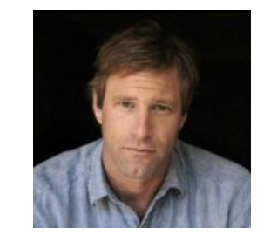

Hello Human
You look like a : Dachshund


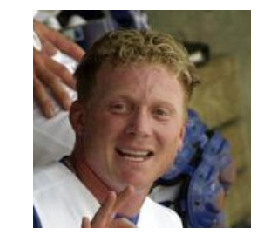

I couldn't detect it as dog or human


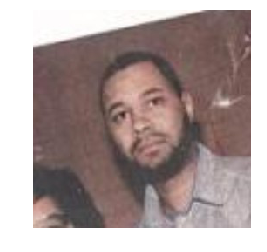

Its a dog of breed : Affenpinscher


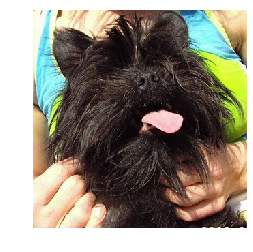

Its a dog of breed : Affenpinscher


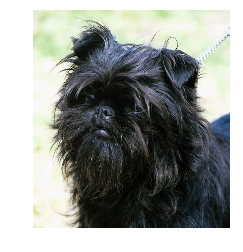

Its a dog of breed : Brussels griffon


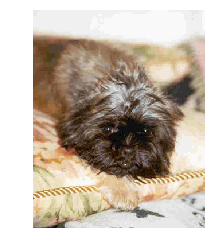

In [39]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if(face_detector(img_path)):
        print("Hello Human")
        print("You look like a :", predict_breed_transfer(img_path))
        display_image(img_path)
    elif(dog_detector(img_path)):
        print("Its a dog of breed :", predict_breed_transfer(img_path))
        display_image(img_path) 
    else:
        print("I couldn't detect it as dog or human")
        display_image(img_path)
    

for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 1) Data pre-processing and more augmentation will help to train the model better.

2) Should try out different models such as resnet for image classification and compare which gives better results.

3) Training with different hyperparameters is needed to tune the model's performance.

4) Coding skills needs to be improved to write clean, modular and readable code.

5) Needs to learn more data pre-processing techniques.

Its a dog of breed : Australian shepherd


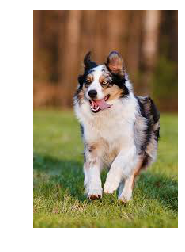

Hello Human
You look like a : Chinese crested


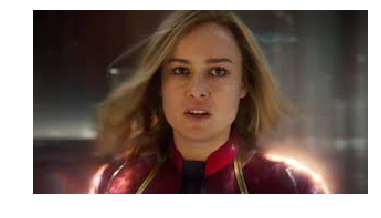

Hello Human
You look like a : Ibizan hound


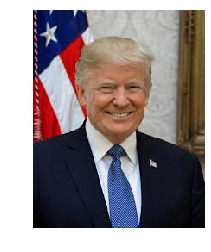

I couldn't detect it as dog or human


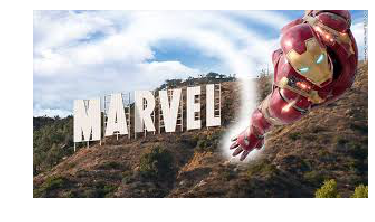

I couldn't detect it as dog or human


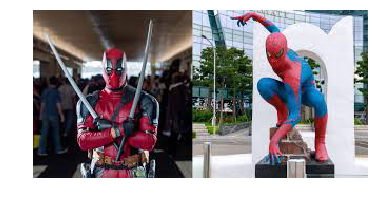

Its a dog of breed : Poodle


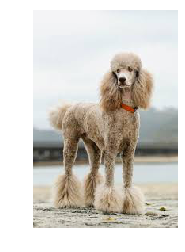

In [40]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below

# load local images
local_files = np.array(glob("./images/*"))

#for file in np.hstack((human_files[:3], dog_files[:3])):
#    run_app(file)

for file in local_files:
    run_app(file)